In [50]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Function

In [51]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import os
from pathlib import Path
import cv2
import math

In [52]:
def  twoCut(projection):
  dif = []
  # print(projection)
  projection.append(0)
  for i in range(len(projection)): 
    if i<len(projection)-1:
      dif.append(abs(projection[i]-projection[i+1]))
  # print('projection: ',projection)
  # print('dif:        ',dif)
  
  n = len(dif)
  max1 = dif[0]
  max2 = dif[-1]
  temp1 = []
  temp2 = []

  for i in range(n):
    if i<n/2:
      temp1.append(dif[i])
      if dif[i]>max1:
        max1=dif[i]
    else:
      temp2.append(dif[i])
      if dif[i]>max2:
        max2=dif[i]
  # print(temp1)
  # print(temp2)
  # print('max: ',max1,' ',max2)

  max1 = temp1.index(max1)

  for i, e in reversed(list(enumerate(temp2))):
    if temp2[i]==max2:
      max2=i
      break
  max2 = len(temp1)+max2
  if max2==(len(projection)-1):
    max2-=1
  max = abs(max1-max2)

  # print('max: ',max1,' ',max2)

  return max,max1,max2

In [53]:
def VPP_2(imgPath,printPic=False):
  # ================ picture 1 ================ 
  img1 = cv2.imread(imgPath)
  img1 = img1
  # print(img1)
  h, w, c = img1.shape
  temp = np.ones(3)*255
  temp = temp.astype(np.int32)
  m = []
  for i in range(w):
    m.append(temp)
  n = []
  n.append(m)
  n = np.asarray(n)
  # print(img1)
  # print(n)
  
  img1 = np.concatenate((img1,n))
  img1 = np.concatenate((n,img1))
  img1 = img1[:,:, ::-1]
  img3=img1
  # if printPic:
  #   plt.imshow(img1)
  #   plt.show()

  # ================ picture 2 ================ 
  h, w, c = img1.shape

  pjt = []
  temp = 0
  # create projection list
  for j in range(h):
    temp = 0
    for i in range(w):
      if img1[j][i][0]!=255:
        temp+=1
    pjt.append(temp)

  # img2 = np.ones(img1.shape)

  # for j in range(h):
  #   for i in range(pjt[j]):
  #     img2[j,i] = 0
  # if printPic:
  #   plt.imshow(img2)
  #   plt.show()

  # ================ picture 3 ================ 
  sizePX,start,end = twoCut(pjt)
  for i in range(w):
    img3[start,i] = (200,100,123)
    img3[end,i] = (200,100,123)
  if printPic:
    plt.imshow(img3)
    plt.show()
  return sizePX

In [54]:
def find_pixel(df):
  from tqdm import tqdm

  base_size = []
  height = []

  path = df.loc[:, 'path'].values
  for i in tqdm(path):
    try:
      base = VPP_2(i,printPic=False)
      img = cv2.imread(i)
      h = img.shape[0]
    except:
      pass
    base_size.append(base)
    height.append(h)
  return base_size, height

In [55]:
df = prepare_train_data()
df

NameError: ignored

# Test set

old test

In [6]:
!gdown --id 1L9d532KH68mmhyZZtipG0qio49aKNqWH

Downloading...
From: https://drive.google.com/uc?id=1L9d532KH68mmhyZZtipG0qio49aKNqWH
To: /content/test_crop_png.zip
100% 84.1M/84.1M [00:01<00:00, 55.4MB/s]


In [7]:
!unzip -q /content/test_crop_png.zip

new test

In [8]:
!gdown --id 1hGOBgyZgNMZOu_YetV79PuH_ioIxEWSk # 0
!gdown --id 1SmJCGFZK_caM67TCcGvFUnVFj11_bU4l # 1
!gdown --id 1Hx0BA8B-CgRuLyr7Xjmm08Pw0Oml-OT1 # 2
!gdown --id 1xrtV-og2NZxV4TLp4Ai_fGBn0DEtjf-1 # 3
!gdown --id 12L6lA3PJpCzyoTf9pneDpBue5h3U4wo1 # 4

!unzip -q /content/crop0.zip
!unzip -q /content/crop1.zip
!unzip -q /content/crop2.zip
!unzip -q /content/crop3.zip
!unzip -q /content/crop4.zip

Downloading...
From: https://drive.google.com/uc?id=1hGOBgyZgNMZOu_YetV79PuH_ioIxEWSk
To: /content/crop0.zip
100% 16.7M/16.7M [00:00<00:00, 28.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1SmJCGFZK_caM67TCcGvFUnVFj11_bU4l
To: /content/crop1.zip
100% 17.2M/17.2M [00:00<00:00, 19.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Hx0BA8B-CgRuLyr7Xjmm08Pw0Oml-OT1
To: /content/crop2.zip
100% 16.6M/16.6M [00:00<00:00, 39.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1xrtV-og2NZxV4TLp4Ai_fGBn0DEtjf-1
To: /content/crop3.zip
100% 16.9M/16.9M [00:00<00:00, 39.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=12L6lA3PJpCzyoTf9pneDpBue5h3U4wo1
To: /content/crop4.zip
100% 16.3M/16.3M [00:00<00:00, 46.2MB/s]


# prepare dataset

In [10]:
def prepare_test_data(path_test_folder):

  # get the data frame with "filename", "path", and "parentId"
  file_name = os.listdir(path_test_folder)
  df_test = pd.DataFrame(data=file_name, columns=['file_name'])
  df_test['path'] = df_test['file_name'].apply(lambda x:path_test_folder+"/"+x)
  df_test['parentId'] = df_test['file_name'].apply(lambda x:x.split('.')[0])
  
  # get base_line pixel (vppPix) and height of the cropped image
  base, height = find_pixel(df_test)

  # create test dataframe with parentId, vppPix, height
  df_test['vppPix'] = base
  df_test['height'] = height
  df_test.drop(columns=['file_name', 'path'], inplace=True, axis=1)

  return df_test
  # get dataframe of parentId

In [ ]:
df_test1 = prepare_test_data("/content/crop_1")
df_test2 = prepare_test_data("/content/crop_2")
df_test = pd.concat([df_test1, df_test2], axis=0)

100%|██████████| 47746/47746 [06:35<00:00, 120.61it/s]


In [ ]:
df_test

,parentId,vppPix,height
0,748abece,14,24
1,61e454e8,9,19
2,eadd3c72,18,20
3,fcefa1e3,15,15
4,a4f74a66,9,18
...,...,...,...
47741,18809b22,9,19
47742,17b676d6,7,22
47743,e855d2ea,7,14
47744,30ea0b60,12,14


In [ ]:
# df_test.reset_index(drop=True, inplace=True)

In [ ]:
df_test.to_csv("df_test.csv")

df_test.csv

In [101]:
df_test = pd.read_csv('df_test.csv')
df_test.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
df_test.reset_index(drop=True, inplace=True)
df_test

,parentId,vppPix,height
0,748abece,14,24
1,61e454e8,9,19
2,eadd3c72,18,20
3,fcefa1e3,15,15
4,a4f74a66,9,18
...,...,...,...
95992,18809b22,9,19
95993,17b676d6,7,22
95994,e855d2ea,7,14
95995,30ea0b60,12,14


### map font family to df_test

In [126]:
df_font_1 = pd.read_csv("/content/file_submission_lastset.csv")
df_font_1.loc[len(df_font_1.index)] = ['d592bfe3_file', 'TH_Mali_Grade6.ttf']
df_font_1.rename({'d592bfe3_file':'parentId', 'TH_Mali_Grade6.ttf':'font_family'}, axis=1, inplace=True)
# change format a bit
df_font_1['parentId'] = df_font_1['parentId'].apply(lambda x:x.split("_")[0])
df_font_1['font_family'] = df_font_1['font_family'].apply(lambda x:x.split(".")[0])
df_font_1

,parentId,font_family
0,71642b03,DM_Shining_Star_Regular
1,2b9b2d66,Kunlasatri
2,6fd539e4,DM_Shining_Star_Regular
3,140417e0,fonttintin
4,b82dc8f6,TH_Mali_Grade6
...,...,...
47741,17b676d6,fonttintin
47742,e855d2ea,Cordia_New
47743,30ea0b60,Kunlasatri
47744,1d8c14a5,fonttintin


In [127]:
df_font_2 = pd.read_csv("/content/SubmissionTheLast.csv")
df_font_2.drop("Unnamed: 0", axis=1, inplace=True)
df_font_2.rename({"name":"parentId", "id":"font_family"}, axis=1, inplace=True)
df_font_2

,parentId,font_family
0,59d1a058,TH_Charm_of_AU
1,41bc5499,fonttintin
2,026b8969,fonttintin
3,38a6dbf6,fonttintin
4,1d9c463b,fonttintin
...,...,...
48246,ebb1a165,THSarabun
48247,e606c46f,TH_Chakra_Petch
48248,aac33d78,fonttintin
48249,62a005b5,fonttintin


In [129]:
df_font = pd.concat([df_font_1,df_font_2], axis=0)
df_font.reset_index(drop=True, inplace=True)
df_font

,parentId,font_family
0,71642b03,DM_Shining_Star_Regular
1,2b9b2d66,Kunlasatri
2,6fd539e4,DM_Shining_Star_Regular
3,140417e0,fonttintin
4,b82dc8f6,TH_Mali_Grade6
...,...,...
95992,ebb1a165,THSarabun
95993,e606c46f,TH_Chakra_Petch
95994,aac33d78,fonttintin
95995,62a005b5,fonttintin


In [130]:
df_font['font_family'].unique()

array(['DM_Shining_Star_Regular', 'Kunlasatri', 'fonttintin',
       'TH_Mali_Grade6', 'TH_Charm_of_AU', 'Angsana_New',
       'FC_Knomphing_Regular', 'Cordia_New', 'TH_Sarabun',
       'TH_Chakra_Petch', 'DM_Shining Star_Regular', 'ANGSA', 'CORDIA',
       'THSarabun'], dtype=object)

In [131]:
def change_wrong_font(font_name):
  font_correct = ""
  if font_name == 'DM_Shining Star_Regular':
    font_correct = 'DM_Shining_Star_Regular'
  elif font_name == 'ANGSA':
    font_correct = 'Angsana_New'
  elif font_name == 'CORDIA':
    font_correct = 'Cordia_New'
  elif font_name == 'THSarabun':
    font_correct = 'TH_Sarabun'
  else:
    font_correct = font_name
  return font_correct

In [132]:
df_font['font_family'] = df_font['font_family'].apply(change_wrong_font)
df_font

,parentId,font_family
0,71642b03,DM_Shining_Star_Regular
1,2b9b2d66,Kunlasatri
2,6fd539e4,DM_Shining_Star_Regular
3,140417e0,fonttintin
4,b82dc8f6,TH_Mali_Grade6
...,...,...
95992,ebb1a165,TH_Sarabun
95993,e606c46f,TH_Chakra_Petch
95994,aac33d78,fonttintin
95995,62a005b5,fonttintin


In [133]:
df_font['font_family'].unique()

array(['DM_Shining_Star_Regular', 'Kunlasatri', 'fonttintin',
       'TH_Mali_Grade6', 'TH_Charm_of_AU', 'Angsana_New',
       'FC_Knomphing_Regular', 'Cordia_New', 'TH_Sarabun',
       'TH_Chakra_Petch'], dtype=object)

In [134]:
df_font.to_csv("fontSubmit.csv")

In [114]:
df_test = df_test.merge(df_font)

In [115]:
df_test

,parentId,vppPix,height,font_family
0,748abece,14,24,DM_Shining_Star_Regular
1,61e454e8,9,19,DM_Shining_Star_Regular
2,eadd3c72,18,20,fonttintin
3,fcefa1e3,15,15,Kunlasatri
4,a4f74a66,9,18,Kunlasatri
...,...,...,...,...
95992,18809b22,9,19,fonttintin
95993,17b676d6,7,22,fonttintin
95994,e855d2ea,7,14,Cordia_New
95995,30ea0b60,12,14,Kunlasatri


In [116]:
df_test['font_family'].unique()

array(['DM_Shining_Star_Regular', 'fonttintin', 'Kunlasatri',
       'FC_Knomphing_Regular', 'Cordia_New', 'TH_Chakra_Petch',
       'TH_Mali_Grade6', 'Angsana_New', 'TH_Charm_of_AU', 'TH_Sarabun'],
      dtype=object)

In [117]:
df_test.to_csv("df_test_final.csv")

### one hot

In [118]:
df_test = pd.get_dummies(df_test, columns=['font_family'])
# df_test.drop('parentId', axis=1,inplace=True)
df_test


,parentId,vppPix,height,font_family_Angsana_New,font_family_Cordia_New,font_family_DM_Shining_Star_Regular,font_family_FC_Knomphing_Regular,font_family_Kunlasatri,font_family_TH_Chakra_Petch,font_family_TH_Charm_of_AU,font_family_TH_Mali_Grade6,font_family_TH_Sarabun,font_family_fonttintin
0,748abece,14,24,0,0,1,0,0,0,0,0,0,0
1,61e454e8,9,19,0,0,1,0,0,0,0,0,0,0
2,eadd3c72,18,20,0,0,0,0,0,0,0,0,0,1
3,fcefa1e3,15,15,0,0,0,0,1,0,0,0,0,0
4,a4f74a66,9,18,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95992,18809b22,9,19,0,0,0,0,0,0,0,0,0,1
95993,17b676d6,7,22,0,0,0,0,0,0,0,0,0,1
95994,e855d2ea,7,14,0,1,0,0,0,0,0,0,0,0
95995,30ea0b60,12,14,0,0,0,0,1,0,0,0,0,0


# Model

### Train data

In [ ]:
df_train = pd.read_csv("/content/pycaret_v1.csv")
df_train.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
dataset = df_train.copy()
dataset

,height,fontSize,vppPix,ratio_cropped_to_height,fontFamily_Angsana_New,fontFamily_Cordia_New,fontFamily_DM_Shining_Star_Regular,fontFamily_FC_Knomphing_Regular,fontFamily_Kunlasatri,fontFamily_TH_Chakra_Petch,fontFamily_TH_Charm_of_AU,fontFamily_TH_Mali_Grade6,fontFamily_TH_Sarabun,fontFamily_fonttintin
0,20,16,10,168.400000,0,0,0,0,0,1,0,0,0,0
1,19,16,10,168.400000,0,0,0,0,0,1,0,0,0,0
2,14,16,11,153.090909,0,0,0,0,0,1,0,0,0,0
3,43,16,10,168.400000,0,0,0,0,0,1,0,0,0,0
4,15,16,10,168.400000,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110243,20,22,19,88.631579,0,0,0,0,1,0,0,0,0,0
110244,24,22,16,105.250000,0,0,0,0,1,0,0,0,0,0
110245,18,22,19,88.631579,0,0,0,0,1,0,0,0,0,0
110246,20,22,16,105.250000,0,0,0,0,1,0,0,0,0,0


In [ ]:
df_10000 = dataset[10000:20000]

In [ ]:
data = df_10000.sample(frac=0.9, random_state=786)
data_unseen = df_10000.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (9000, 14)
Unseen Data For Predictions: (1000, 14)


In [ ]:
data.drop("ratio_cropped_to_height", axis=1, inplace=True)
data_unseen.drop("ratio_cropped_to_height", axis=1, inplace=True)

--

In [ ]:
data = data[['fontSize', 'height', 'vppPix']]
data

,fontSize,height,vppPix
0,20,15,16
1,16,12,13
2,16,14,12
3,22,17,17
4,14,9,10
...,...,...,...
8995,16,20,9
8996,16,19,11
8997,20,18,17
8998,22,25,25


In [ ]:
data_unseen = data_unseen[['fontSize', 'height', 'vppPix']]
data_unseen

,fontSize,height,vppPix
0,16,15,8
1,14,11,10
2,22,18,17
3,16,10,11
4,16,10,11
...,...,...,...
995,12,10,9
996,14,9,10
997,14,9,10
998,12,10,9


### pycaret

In [ ]:
from pycaret.classification import *
exp_mclf101 = setup(data = data, target = 'fontSize', session_id=123) 

,Description,Value
0,session_id,123
1,Target,fontSize
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(9000, 13)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,10
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best = compare_models(fold=12)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7909,0.9440,0.7146,0.7879,0.7864,0.7156,0.7170,0.7700
et,Extra Trees Classifier,0.7871,0.9252,0.7139,0.7844,0.7829,0.7109,0.7121,0.7775
lightgbm,Light Gradient Boosting Machine,0.7844,0.9479,0.7031,0.7814,0.7773,0.7037,0.7068,0.5783
dt,Decision Tree Classifier,0.7800,0.8940,0.7059,0.7770,0.7758,0.7015,0.7026,0.0283
knn,K Neighbors Classifier,0.7377,0.9106,0.6391,0.7317,0.7293,0.6391,0.6418,0.1375
gbc,Gradient Boosting Classifier,0.7131,0.9197,0.5842,0.7075,0.6923,0.5946,0.6045,3.2475
ada,Ada Boost Classifier,0.5434,0.6957,0.3913,0.5076,0.5123,0.3542,0.3606,0.2675
lr,Logistic Regression,0.4891,0.7920,0.2324,0.3551,0.3680,0.1462,0.2178,3.3008
lda,Linear Discriminant Analysis,0.4425,0.6828,0.1491,0.2185,0.2796,0.0131,0.0402,0.0308
dummy,Dummy Classifier,0.4423,0.5000,0.1429,0.1956,0.2713,0.0000,0.0000,0.0167


In [ ]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8032,0.9469,0.7287,0.8001,0.7995,0.7323,0.7336
1,0.7778,0.9403,0.7158,0.7766,0.7738,0.7001,0.7011
2,0.7508,0.9299,0.6778,0.7463,0.7467,0.6606,0.6618
3,0.7540,0.9363,0.6778,0.7494,0.7500,0.6683,0.6689
4,0.7810,0.9354,0.7008,0.7769,0.7751,0.7005,0.7022
5,0.8190,0.9543,0.7499,0.8167,0.8162,0.7550,0.7558
6,0.7968,0.9485,0.7171,0.7956,0.7933,0.7256,0.7264
7,0.7746,0.9438,0.6870,0.7706,0.7668,0.6880,0.6921
8,0.8063,0.9557,0.7282,0.8011,0.8012,0.7360,0.7374
9,0.7933,0.9499,0.7076,0.7877,0.7873,0.7185,0.7199


In [ ]:
print(rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)


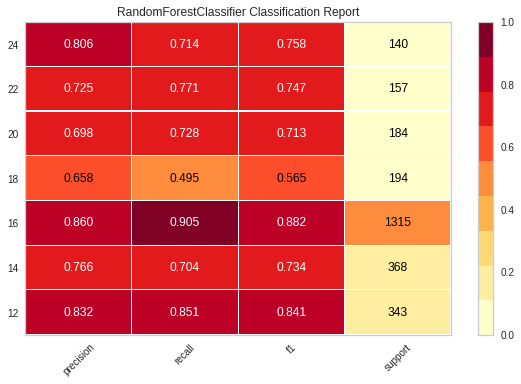

In [ ]:
plot_model(rf, plot = 'class_report')

In [ ]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
final_rf = finalize_model(rf)

In [ ]:
predict_model(final_rf, data=data_unseen)

In [ ]:
save_model(final_rf,'Final RF Model 08Feb2020')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='fontSize',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_str...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                                         max_l

In [ ]:
saved_final_rf = load_model('Final RF Model 08Feb2020')

In [ ]:
new_prediction = predict_model(saved_final_rf, data=data_unseen[:100])

### try my own sklearn random forest

In [ ]:
dataset = dataset.drop('ratio_cropped_to_height' , axis=1)
dataset

,height,fontSize,vppPix,fontFamily_Angsana_New,fontFamily_Cordia_New,fontFamily_DM_Shining_Star_Regular,fontFamily_FC_Knomphing_Regular,fontFamily_Kunlasatri,fontFamily_TH_Chakra_Petch,fontFamily_TH_Charm_of_AU,fontFamily_TH_Mali_Grade6,fontFamily_TH_Sarabun,fontFamily_fonttintin
0,20,16,10,0,0,0,0,0,1,0,0,0,0
1,19,16,10,0,0,0,0,0,1,0,0,0,0
2,14,16,11,0,0,0,0,0,1,0,0,0,0
3,43,16,10,0,0,0,0,0,1,0,0,0,0
4,15,16,10,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110243,20,22,19,0,0,0,0,1,0,0,0,0,0
110244,24,22,16,0,0,0,0,1,0,0,0,0,0
110245,18,22,19,0,0,0,0,1,0,0,0,0,0
110246,20,22,16,0,0,0,0,1,0,0,0,0,0


In [ ]:
X = dataset.drop('fontSize', axis=1)
y = dataset['fontSize']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, shuffle=True, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(77173, 12) (77173,) (33075, 12) (33075,)


In [ ]:
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=8998, verbose=0,
                       warm_start=False)

In [ ]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=8998, verbose=0,
                       warm_start=False)

In [ ]:
forest.score(X_test, y_test)

0.7919274376417234

In [ ]:
import pickle
pickle.dump(forest, open('randomForest.sav', 'wb'))

### load model

In [ ]:
loaded_model = pickle.load(open('randomForest.sav', 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7919274376417234


### try som train data to predict

In [ ]:
test = df_train[20000:30000]
test.drop('ratio_cropped_to_height', axis=1, inplace=True)
test

,height,fontSize,vppPix,fontFamily_Angsana_New,fontFamily_Cordia_New,fontFamily_DM_Shining_Star_Regular,fontFamily_FC_Knomphing_Regular,fontFamily_Kunlasatri,fontFamily_TH_Chakra_Petch,fontFamily_TH_Charm_of_AU,fontFamily_TH_Mali_Grade6,fontFamily_TH_Sarabun,fontFamily_fonttintin
20000,10,12,10,0,1,0,0,0,0,0,0,0,0
20001,11,12,6,0,1,0,0,0,0,0,0,0,0
20002,9,12,9,0,1,0,0,0,0,0,0,0,0
20003,9,12,10,0,1,0,0,0,0,0,0,0,0
20004,10,12,10,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,107,16,27,0,1,0,0,0,0,0,0,0,0
29996,7,12,8,0,0,0,0,0,0,0,1,0,0
29997,19,16,18,0,0,0,0,0,0,0,0,0,1
29998,81,16,10,0,1,0,0,0,0,0,0,0,0


In [ ]:
X_test = test.drop('fontSize', axis=1)
y_test = test['fontSize']

In [ ]:
loaded_model.predict(X_test)

array([14, 12, 12, ..., 16, 16, 12])

In [ ]:
result = loaded_model.score(X_test, y_test)
print(result)

0.8484


# Predict test data

In [119]:
df_test

,parentId,vppPix,height,font_family_Angsana_New,font_family_Cordia_New,font_family_DM_Shining_Star_Regular,font_family_FC_Knomphing_Regular,font_family_Kunlasatri,font_family_TH_Chakra_Petch,font_family_TH_Charm_of_AU,font_family_TH_Mali_Grade6,font_family_TH_Sarabun,font_family_fonttintin
0,748abece,14,24,0,0,1,0,0,0,0,0,0,0
1,61e454e8,9,19,0,0,1,0,0,0,0,0,0,0
2,eadd3c72,18,20,0,0,0,0,0,0,0,0,0,1
3,fcefa1e3,15,15,0,0,0,0,1,0,0,0,0,0
4,a4f74a66,9,18,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95992,18809b22,9,19,0,0,0,0,0,0,0,0,0,1
95993,17b676d6,7,22,0,0,0,0,0,0,0,0,0,1
95994,e855d2ea,7,14,0,1,0,0,0,0,0,0,0,0
95995,30ea0b60,12,14,0,0,0,0,1,0,0,0,0,0


In [120]:
df_test.drop("parentId", axis=1, inplace=True)
df_test

,vppPix,height,font_family_Angsana_New,font_family_Cordia_New,font_family_DM_Shining_Star_Regular,font_family_FC_Knomphing_Regular,font_family_Kunlasatri,font_family_TH_Chakra_Petch,font_family_TH_Charm_of_AU,font_family_TH_Mali_Grade6,font_family_TH_Sarabun,font_family_fonttintin
0,14,24,0,0,1,0,0,0,0,0,0,0
1,9,19,0,0,1,0,0,0,0,0,0,0
2,18,20,0,0,0,0,0,0,0,0,0,1
3,15,15,0,0,0,0,1,0,0,0,0,0
4,9,18,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
95992,9,19,0,0,0,0,0,0,0,0,0,1
95993,7,22,0,0,0,0,0,0,0,0,0,1
95994,7,14,0,1,0,0,0,0,0,0,0,0
95995,12,14,0,0,0,0,1,0,0,0,0,0


In [121]:
import pickle
loaded_model = pickle.load(open('randomForest.sav', 'rb'))
font_size = loaded_model.predict(df_test)
font_size

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fit

array([18, 12, 18, ..., 12, 12, 12])

# Make submission form

In [123]:
df_test = pd.read_csv('df_test_final.csv')
df_test.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
df_test.reset_index(drop=True, inplace=True)

df_submit = df_test.copy()
df_submit = df_submit['parentId']
df_submit = pd.DataFrame(data=df_submit, columns=['parentId'])
df_submit['font_size'] = font_size
df_submit

,parentId,font_size
0,748abece,18
1,61e454e8,12
2,eadd3c72,18
3,fcefa1e3,18
4,a4f74a66,12
...,...,...
95992,18809b22,12
95993,17b676d6,12
95994,e855d2ea,12
95995,30ea0b60,12


In [125]:
df_submit.to_csv("submissionFontsize.csv")

# PyCaret

In [ ]:
!pip install pycaret

     |████████████████████████████████| 301 kB 5.1 MB/s 
     |████████████████████████████████| 86 kB 5.7 MB/s 
     |████████████████████████████████| 167 kB 55.1 MB/s 
     |████████████████████████████████| 2.0 MB 51.2 MB/s 
     |████████████████████████████████| 1.7 MB 54.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.8 MB 46.1 MB/s 
     |████████████████████████████████| 261 kB 65.0 MB/s 
     |████████████████████████████████| 56 kB 4.8 MB/s 
     |████████████████████████████████| 15.6 MB 51.5 MB/s 
     |████████████████████████████████| 1.3 MB 54.1 MB/s 
     |████████████████████████████████| 114 kB 47.0 MB/s 
     |████████████████████████████████| 303 kB 54.9 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 102 kB 10.4 MB/s 
     |███████████████████

In [ ]:
!pip -q install requests==2.23.0
!pip -q install folium==0.2.1
!pip uninstall imgaug
!pip -q install imgaug==0.2.5

     |████████████████████████████████| 58 kB 2.8 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.1.0 requires requests>=2.24.0, but you have requests 2.23.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 69 kB 3.7 MB/s 
Found existing installation: imgaug 0.2.9
Uninstalling imgaug-0.2.9:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/imgaug-0.2.9.dist-info/*
    /usr/local/lib/python3.7/dist-packages/imgaug/*
Proceed (y/n)? y
  Successfully uninstalled imgaug-0.2.9
     |████████████████████████████████| 562 kB 5.1 MB/s 


In [ ]:
dataset = df_train.copy()
dataset.drop(columns=['parentId'], axis=1, inplace=True)
dataset = pd.get_dummies(dataset, columns=['fontFamily'])
dataset
# dataset.to_csv("/content/gdrive/MyDrive/font_recognition/train/zee/pycaret_v1.csv")

,height,fontSize,vppPix,ratio_cropped_to_height,fontFamily_Angsana_New,fontFamily_Cordia_New,fontFamily_DM_Shining_Star_Regular,fontFamily_FC_Knomphing_Regular,fontFamily_Kunlasatri,fontFamily_TH_Chakra_Petch,fontFamily_TH_Charm_of_AU,fontFamily_TH_Mali_Grade6,fontFamily_TH_Sarabun,fontFamily_fonttintin
0,20,16,10,168.400000,0,0,0,0,0,1,0,0,0,0
1,19,16,10,168.400000,0,0,0,0,0,1,0,0,0,0
2,14,16,11,153.090909,0,0,0,0,0,1,0,0,0,0
3,43,16,10,168.400000,0,0,0,0,0,1,0,0,0,0
4,15,16,10,168.400000,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110243,20,22,19,88.631579,0,0,0,0,1,0,0,0,0,0
110244,24,22,16,105.250000,0,0,0,0,1,0,0,0,0,0
110245,18,22,19,88.631579,0,0,0,0,1,0,0,0,0,0
110246,20,22,16,105.250000,0,0,0,0,1,0,0,0,0,0


In [ ]:
dataset

,height,fontSize,vppPix,ratio_cropped_to_height,fontFamily_Angsana_New,fontFamily_Cordia_New,fontFamily_DM_Shining_Star_Regular,fontFamily_FC_Knomphing_Regular,fontFamily_Kunlasatri,fontFamily_TH_Chakra_Petch,fontFamily_TH_Charm_of_AU,fontFamily_TH_Mali_Grade6,fontFamily_TH_Sarabun,fontFamily_fonttintin
0,20,16,10,168.400000,0,0,0,0,0,1,0,0,0,0
1,19,16,10,168.400000,0,0,0,0,0,1,0,0,0,0
2,14,16,11,153.090909,0,0,0,0,0,1,0,0,0,0
3,43,16,10,168.400000,0,0,0,0,0,1,0,0,0,0
4,15,16,10,168.400000,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110243,20,22,19,88.631579,0,0,0,0,1,0,0,0,0,0
110244,24,22,16,105.250000,0,0,0,0,1,0,0,0,0,0
110245,18,22,19,88.631579,0,0,0,0,1,0,0,0,0,0
110246,20,22,16,105.250000,0,0,0,0,1,0,0,0,0,0


In [ ]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (99223, 14)
Unseen Data For Predictions: (11025, 14)


In [ ]:
from pycaret.classification import *
exp_mclf101 = setup(data = data, target = 'fontSize', session_id=123) 

,Description,Value
0,session_id,123
1,Target,fontSize
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(99223, 14)"
5,Missing Values,False
6,Numeric Features,13
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
best = compare_models(fold=20)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7909,0.9537,0.7241,0.7872,0.7872,0.7237,0.7248,4.9630
et,Extra Trees Classifier,0.7909,0.9468,0.7234,0.7868,0.7871,0.7237,0.7248,4.9250
dt,Decision Tree Classifier,0.7845,0.9192,0.7160,0.7803,0.7809,0.7156,0.7165,0.1700
lightgbm,Light Gradient Boosting Machine,0.7740,0.9545,0.6880,0.7715,0.7655,0.6967,0.7010,3.3735
knn,K Neighbors Classifier,0.7367,0.9129,0.6559,0.7305,0.7314,0.6510,0.6523,0.5145
gbc,Gradient Boosting Classifier,0.6839,0.9152,0.5662,0.6753,0.6648,0.5690,0.5774,41.7840
ada,Ada Boost Classifier,0.5231,0.7411,0.3793,0.5044,0.4823,0.3327,0.3462,2.0710
lr,Logistic Regression,0.4861,0.7916,0.2652,0.3447,0.3655,0.1997,0.2714,34.7530
nb,Naive Bayes,0.4241,0.6512,0.2114,0.3071,0.3194,0.1218,0.1508,0.0655
lda,Linear Discriminant Analysis,0.4092,0.7498,0.1593,0.2226,0.2552,0.0257,0.0624,0.1980
